# Classification Model

## Dataset - WNBA team elo ratings


## Step 1 - Calling libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 - Data definition, Data Cleaning and Data Preparation

In [2]:
df = pd.read_csv('wnba-team-elo-ratings.csv')

In [3]:
df.head(10)

,season,date,team1,team2,name1,name2,neutral,playoff,score1,score2,elo1_pre,elo2_pre,elo1_post,elo2_post,prob1,is_home1
0,2019,10/10/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,89,78,1684,1634,1692,1627,0.718,1
1,2019,10/10/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,78,89,1634,1684,1627,1692,0.282,0
2,2019,10/8/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,86,90,1693,1626,1684,1634,0.476,0
3,2019,10/8/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,90,86,1626,1693,1634,1684,0.524,1
4,2019,10/6/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,94,81,1671,1648,1693,1626,0.399,0
5,2019,10/6/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,81,94,1648,1671,1626,1693,0.601,1
6,2019,10/1/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,87,99,1700,1618,1671,1648,0.763,1
7,2019,10/1/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,99,87,1618,1700,1648,1671,0.237,0
8,2019,9/29/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,95,86,1694,1624,1700,1618,0.747,1
9,2019,9/29/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,86,95,1624,1694,1618,1700,0.253,0


### Visualization

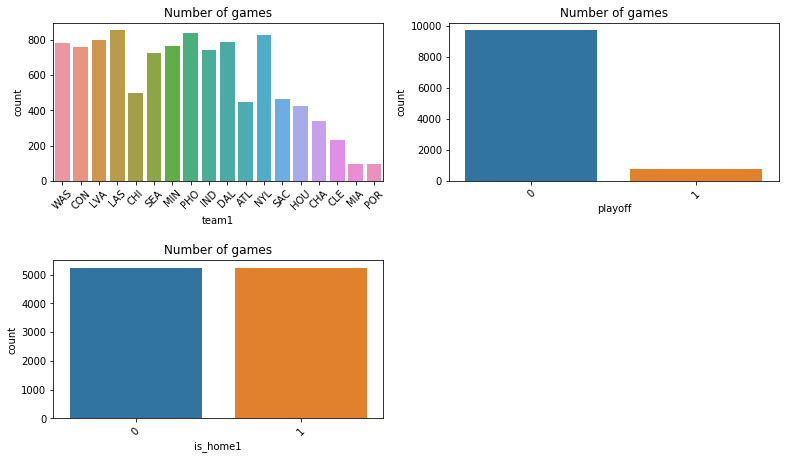

In [4]:
features=['team1','playoff','is_home1']

plot = plt.subplots(figsize=(13,16))

for a, b in enumerate(features):
    plt.subplot(4, 2, a+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=b, data = df)
    plt.xticks(rotation=45)
    plt.title('Number of games')

### Check categories of Label variable - is_home1

In [5]:
df.groupby('is_home1').size()

is_home1
0    5244
1    5244
dtype: int64

### Dropping unrelated columns

In [6]:
i = [0,1,2,3,4,5]
df.drop(df.columns[i],axis=1,inplace=True)

### Current rows and columns of the dataframe

In [7]:
df.shape

(10488, 10)

### Check for null entries if any

In [8]:
df[df.isnull().any(axis=1)]

,neutral,playoff,score1,score2,elo1_pre,elo2_pre,elo1_post,elo2_post,prob1,is_home1


In [9]:
df.head()

,neutral,playoff,score1,score2,elo1_pre,elo2_pre,elo1_post,elo2_post,prob1,is_home1
0,0,1,89,78,1684,1634,1692,1627,0.718,1
1,0,1,78,89,1634,1684,1627,1692,0.282,0
2,0,1,86,90,1693,1626,1684,1634,0.476,0
3,0,1,90,86,1626,1693,1634,1684,0.524,1
4,0,1,94,81,1671,1648,1693,1626,0.399,0


### Datatype check of all the attributes

In [10]:
df.dtypes

neutral        int64
playoff        int64
score1         int64
score2         int64
elo1_pre       int64
elo2_pre       int64
elo1_post      int64
elo2_post      int64
prob1        float64
is_home1       int64
dtype: object

### Data description


In [11]:
pd.set_option('precision',2)
df.describe()


,neutral,playoff,score1,score2,elo1_pre,elo2_pre,elo1_post,elo2_post,prob1,is_home1
count,10488.0,10488.00,10488.00,10488.00,10488.00,10488.00,10488.00,10488.00,10488.00,10488.0
mean,0.0,0.07,74.17,74.17,1493.72,1493.72,1493.72,1493.72,0.50,0.5
std,0.0,0.26,12.41,12.41,87.04,87.04,88.11,88.11,0.18,0.5
min,0.0,0.00,0.00,0.00,1183.00,1183.00,1168.00,1168.00,0.05,0.0
25%,0.0,0.00,66.00,66.00,1442.00,1442.00,1441.00,1441.00,0.36,0.0
50%,0.0,0.00,74.00,74.00,1498.00,1498.00,1497.00,1497.00,0.50,0.5
75%,0.0,0.00,82.00,82.00,1549.00,1549.00,1549.00,1549.00,0.64,1.0
max,0.0,1.00,127.00,127.00,1741.00,1741.00,1743.00,1743.00,0.95,1.0


### Correlation check

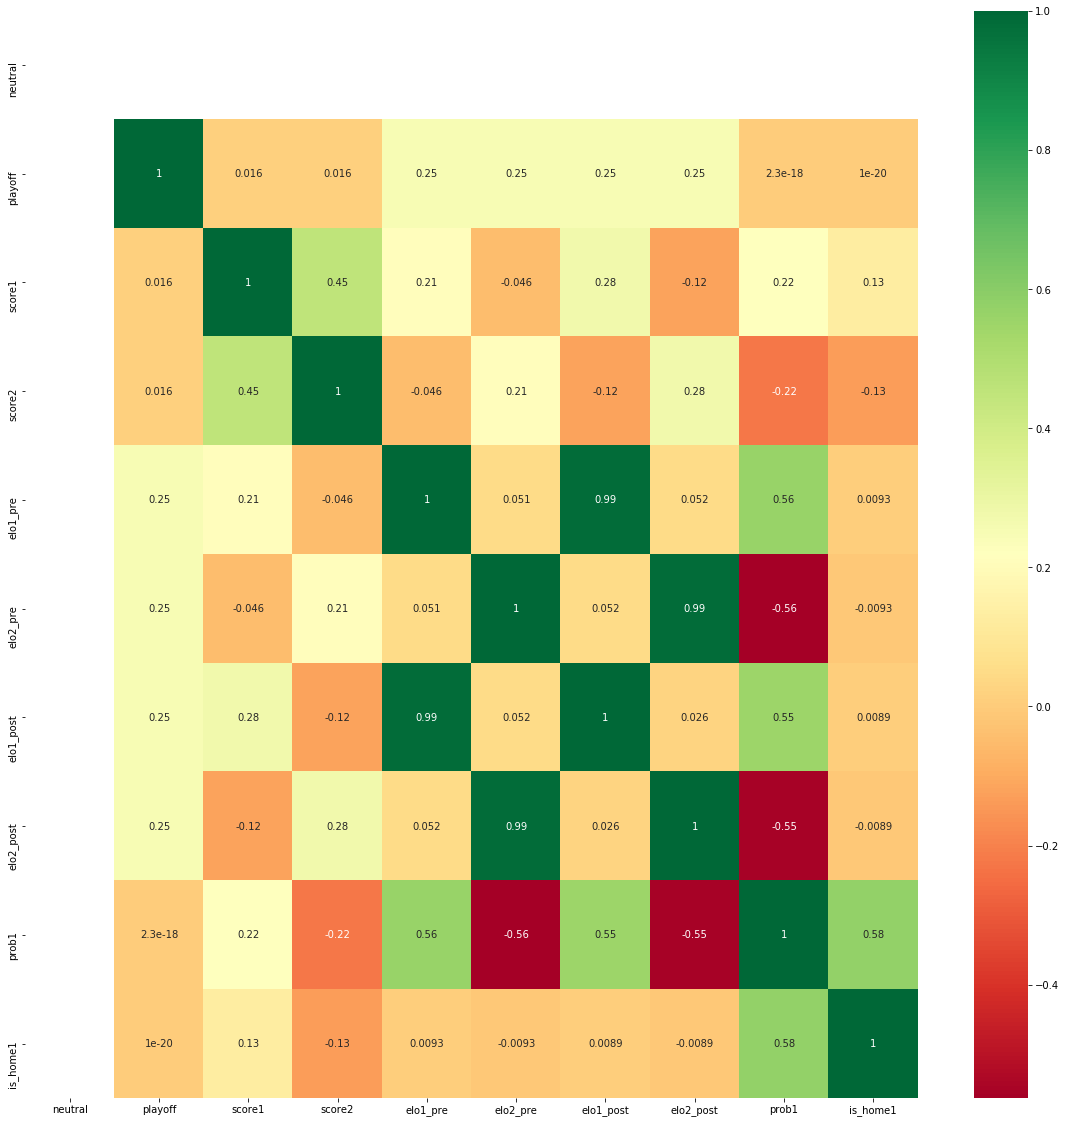

In [12]:
correlation=df.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Dropping the columns which are highly correlated

In [13]:
df = df.drop(columns=['elo1_post','elo2_post','prob1','neutral'])

### Correlation check after columns drop

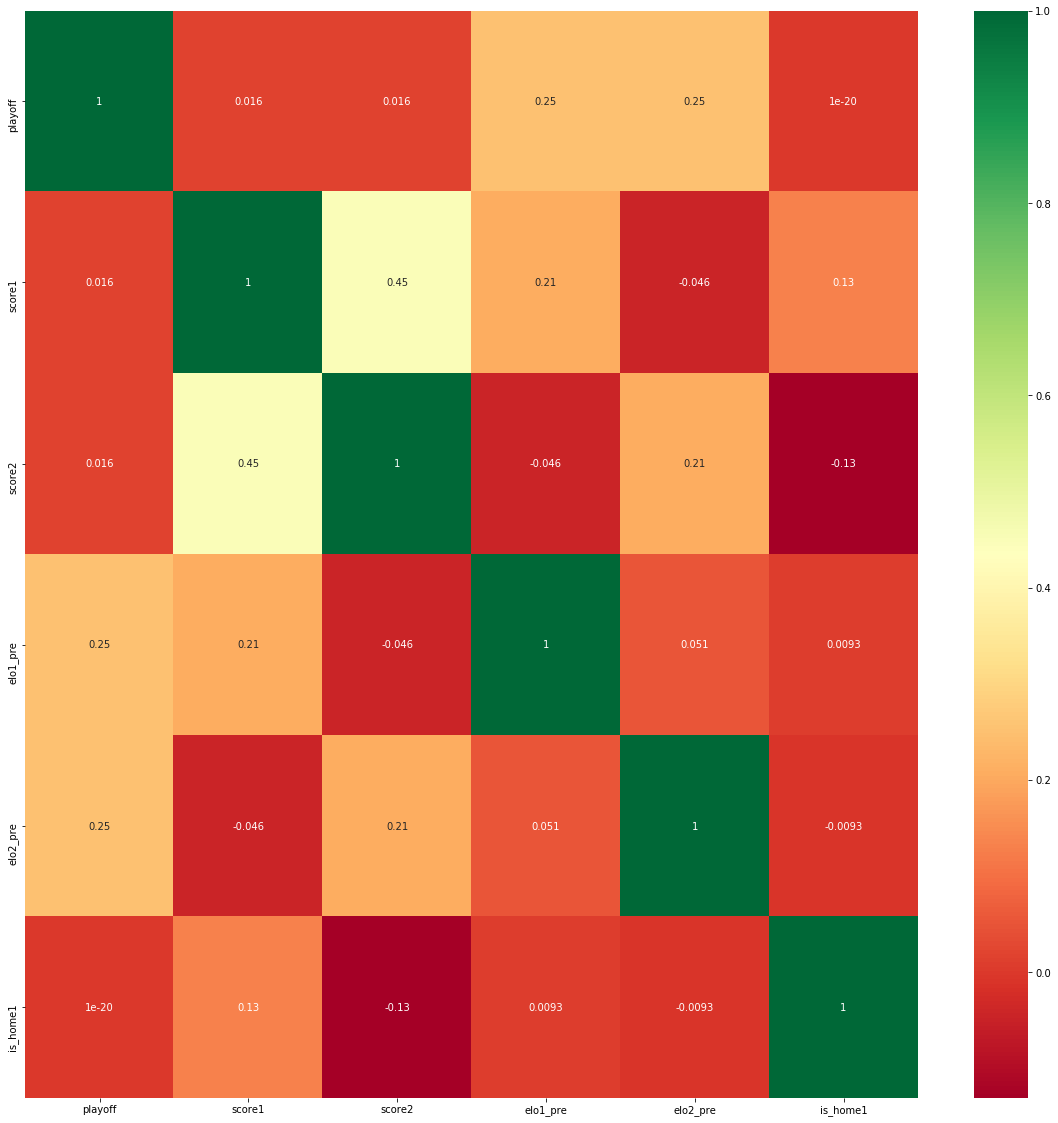

In [14]:
correlation=df.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Skew check

In [15]:
df.skew()

playoff     3.28
score1      0.14
score2      0.14
elo1_pre   -0.24
elo2_pre   -0.24
is_home1    0.00
dtype: float64

### Removing highly skewed attributes

In [16]:
df = df.drop(columns=['playoff'])

In [17]:
df

,score1,score2,elo1_pre,elo2_pre,is_home1
0,89,78,1684,1634,1
1,78,89,1634,1684,0
2,86,90,1693,1626,0
3,90,86,1626,1693,1
4,94,81,1671,1648,0
...,...,...,...,...,...
10483,73,61,1500,1500,0
10484,67,57,1500,1500,0
10485,57,67,1500,1500,1
10486,61,73,1500,1500,1


### Histogram Plot of the attributes

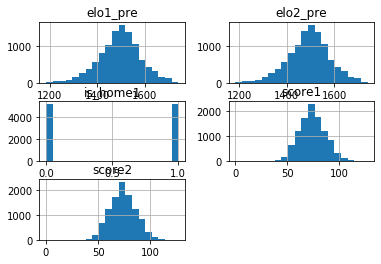

In [18]:
histogram = df.hist(bins=20)
plt.show()

### Box-plot 

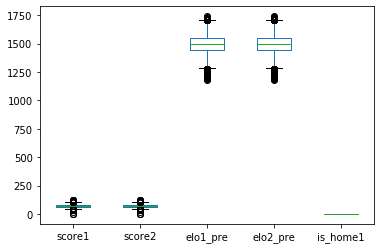

In [19]:
df.plot(kind='box',subplots=False,layout=(3,3),sharex=False,sharey=False)

### Rows and Columns count after Data Cleaning

In [20]:
df.shape

(10488, 5)

In [21]:
df.head()

,score1,score2,elo1_pre,elo2_pre,is_home1
0,89,78,1684,1634,1
1,78,89,1634,1684,0
2,86,90,1693,1626,0
3,90,86,1626,1693,1
4,94,81,1671,1648,0


### Rescaling Data

In [22]:

array = df.values
x = array[:,0:5]
scale=MinMaxScaler(feature_range=(0,3))
rescaled_data=scale.fit_transform(x)
set_printoptions(precision=3)
print(rescaled_data[0:6,:])

[[2.102 1.843 2.694 2.425 3.   ]
 [1.843 2.102 2.425 2.694 0.   ]
 [2.031 2.126 2.742 2.382 0.   ]
 [2.126 2.031 2.382 2.742 3.   ]
 [2.22  1.913 2.624 2.5   0.   ]
 [1.913 2.22  2.5   2.624 3.   ]]


In [23]:
rescaled_data=pd.DataFrame(rescaled_data)

### Defining Features and Labels


In [24]:
features = rescaled_data.values[:,0:4]
label = rescaled_data.values[:,4]

### Train Test Split

In [25]:
trainfeature,testfeature,trainlabel,testlabel=train_test_split(features,label,test_size=.30,random_state=15)

### Correspondence of training and testing data


In [26]:
print(len(trainfeature))
print(len(trainlabel))
print(len(testfeature))
print(len(testlabel))

7341
7341
3147
3147


## Step 3 - Implement Algorithm

In [27]:
obj = DecisionTreeClassifier()
obj.fit(trainfeature,trainlabel)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Step 4 - Prediction

In [28]:
pred_results = obj.predict(testfeature)

## Step 5 - Evaluation

In [29]:
acc = accuracy_score(testlabel,pred_results)
print('Accuracy of the model is {}'.format(acc*100))

Accuracy of the model is 53.35239911026375
